In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('wine.csv')

In [5]:
df.head()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Lets get a summary on the data
df.describe()

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Target                  178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
OD280/OD315             178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [8]:
df.isnull().any()

Target                  False
Alcohol                 False
Malic acid              False
Ash                     False
Alcalinity of ash       False
Magnesium               False
Total phenols           False
Flavanoids              False
Nonflavanoid phenols    False
Proanthocyanins         False
Color intensity         False
Hue                     False
OD280/OD315             False
Proline                 False
dtype: bool

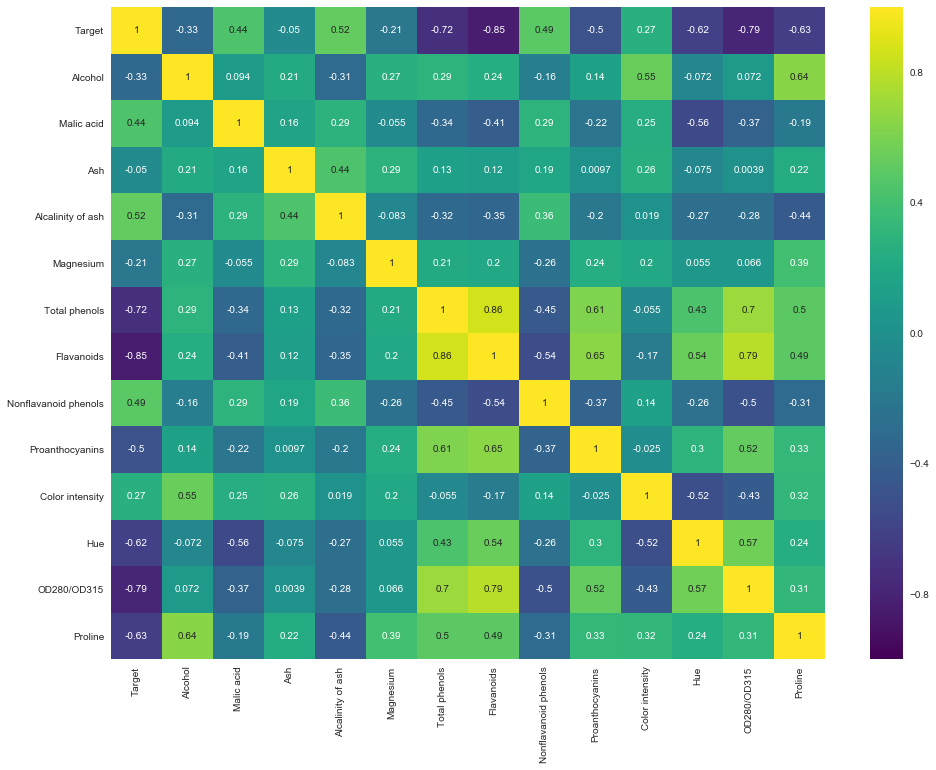

In [10]:
#It seems like the dataset is clean, no null values, all variables are numeric, so we can perform some operations
#First let's try to find some correlation
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [11]:
# Let's try to standardize all columns but the Target
X = df.drop('Target', axis=1)
y = df['Target']

In [12]:
scaler = StandardScaler()

In [16]:
X = scaler.fit_transform(X)

In [18]:
# Now lets split the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Now let's evaluate some model performances before PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [21]:
rf = RandomForestClassifier(n_estimators=100)

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
rf.feature_importances_

array([ 0.1061871 ,  0.02390139,  0.01487327,  0.03320595,  0.03153737,
        0.06360372,  0.13539697,  0.01078669,  0.03588717,  0.20194135,
        0.07591065,  0.1326001 ,  0.13416828])

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=10)

In [26]:
print(accuracies.mean())
print(accuracies.std())

0.967948717949
0.0522347404807


In [27]:
#It seems good already 
pred = rf.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        21
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54



In [30]:
# That was easy...
# Lets see how Support Vector Machine + Gird Search goes
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001, 0.00001]}

In [31]:
grid = GridSearchCV(param_grid=param_grid, estimator=SVC(), verbose=3)

In [32]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.395349 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.414634 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.400000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.720930 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.853659 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.700000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.976744 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.975610 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.950000 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.953488 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.951220 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.975000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.976744 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [33]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [34]:
accuracies = cross_val_score(estimator = grid, X = X_train, y = y_train,cv=10)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.648649 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.702703 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.621622 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1000, gamma=1, score=0.567568 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.945946 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.945946 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=1.000000 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=1.000000 -   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] ..................... C=100, gamma=1e-05, score=0.405405 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=100, gamma=1, score=0.459459 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.540541 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.567568 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.945946 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.945946 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.972973 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.459459 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.540541 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.594595 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=1.000000 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.945946 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.972973 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=10, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.526316 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.567568 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.513514 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=1.000000 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.473684 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.567568 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.945946 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.972973 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.394737 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.945946 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.973684 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.972973 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.918919 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.394737 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... C=10, gamma=1, score=0.526316 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.594595 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.540541 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=1.000000 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.972973 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.945946 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.947368 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ....................... C=1, gamma=0.001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.394737 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................... C=1, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................... C=1, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


In [35]:
pred = grid.predict(X_test)

In [36]:
print('Accuracy mean: ', accuracies.mean())
print('Accuracy std: ', accuracies.std())
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy mean:  0.951923076923
Accuracy std:  0.0641826422901
[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       0.95      1.00      0.98        21
          3       1.00      0.93      0.96        14

avg / total       0.98      0.98      0.98        54



In [37]:
#Random forest is soo good to be true.
#Let's apply PCA and see how it goes
pca = PCA(n_components=3)

In [38]:
X = pca.fit_transform(X)

In [40]:
print(pca.explained_variance_ratio_)

[ 0.36198848  0.1920749   0.11123631]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Let's apply the models again
rf = RandomForestClassifier(n_estimators=100)

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [44]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=10)

In [49]:
pred = rf.predict(X_test)

In [50]:
print('Accuracy mean: ', accuracies.mean())
print('Accuracy std: ', accuracies.std())
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy mean:  0.951923076923
Accuracy std:  0.0541846806641
[[18  1  0]
 [ 0 20  1]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       1.00      0.95      0.97        19
          2       0.95      0.95      0.95        21
          3       0.93      1.00      0.97        14

avg / total       0.96      0.96      0.96        54



In [46]:
# Without PCA got better Results
# Let's see SVM
grid = GridSearchCV(param_grid=param_grid, estimator=SVC(), verbose=3)

In [47]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.395349 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.414634 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.400000 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.906977 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.975610 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=1.000000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ....................... C=100, gamma=0.1, score=0.950000 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.930233 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=0.926829 -   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..................... C=100, gamma=0.001, score=1.000000 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.930233 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.926829 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=1.000000 -   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [48]:
accuracies = cross_val_score(estimator = grid, X = X_train, y = y_train,cv=10)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.945946 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.945946 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=1.000000 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=1.000000 -   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .................... C=1000, gamma=1e-05, score=0.918919 -   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .................... C=1000, gamma=1e-05, score=0.972973 -   0.0s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .................... C=1000, gamma=1e-05, score=1.000000 -   0.0s
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1000, gamma=1, score=0.918919 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.945946 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.864865 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.918919 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.864865 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.918919 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.945946 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.918919 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.837838 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.945946 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=1.000000 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.918919 -   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.945946 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.891892 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.972973 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ........................ C=1000, gamma=1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.891892 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...................... C=1000, gamma=0.1, score=0.972973 -   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .................... C=1000, gamma=0.001, score=0.945946 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ..................... C=100, gamma=0.001, score=0.972973 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.973684 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.891892 -   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .................... C=100, gamma=0.0001, score=0.972973 -   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] ..................... C=100, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] ..................... C=100, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1e-05 ..............................................
[CV] ..................... C=100, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.921053 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.891892 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................... C=100, gamma=1, score=0.972973 -   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....................... C=100, gamma=0.1, score=0.894737 -   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=10, gamma=0.001, score=0.972973 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.394737 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..................... C=10, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ...................... C=10, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] .......................... C=10, gamma=1, score=0.918919 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.947368 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.945946 -   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........................ C=10, gamma=0.1, score=0.918919 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.973684 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.918919 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................... C=10, gamma=0.001, score=0.945946 -   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=1, gamma=0.001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.394737 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.405405 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................... C=1, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] ....................... C=1, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=1, gamma=1e-05 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=1e-05, score=0.394737 -   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ..................... C=0.1, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV] ..................... C=0.1, gamma=1e-05, score=0.405405 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.921053 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.918919 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.891892 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.947368 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


In [51]:
pred = grid.predict(X_test)

In [52]:
print('Accuracy mean: ', accuracies.mean())
print('Accuracy std: ', accuracies.std())
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy mean:  0.951923076923
Accuracy std:  0.0541846806641
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        19
          2       1.00      1.00      1.00        21
          3       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        54



In [ ]:
# Now the SVM model did better.